In [42]:
# python stuff
import glob
import os
import json

# other stuff
import torch
import matplotlib.pyplot as plt

import tools.plot

plot_colors = ['blue', 'red', 'green', 'orange']

# list .pt files that will be plotted
filenames = glob.glob("out/multi_output/*/*.json")
filenames

['out/multi_output/b6287953-2447-43ae-a5c4-0ecb7ae13936/params.json',
 'out/multi_output/a1aa7f16-a5a0-43e3-8a75-a5911f2c0e4d/params.json',
 'out/multi_output/74744da6-a1d0-403e-b6b3-a5996c429efc/params.json',
 'out/multi_output/07f7e094-3bc5-4ed1-b026-5ae88290c4cb/params.json',
 'out/multi_output/08bd374f-c072-45c1-a8de-8361827cd887/params.json',
 'out/multi_output/6e43124e-47e7-49ea-a89f-f5b14783fcbd/params.json',
 'out/multi_output/730ea1d5-6c00-49f4-a883-a9584654cd41/params.json',
 'out/multi_output/47251f21-1520-4d42-8755-f5556826b771/params.json',
 'out/multi_output/2e44a1c3-7daa-4c2f-8cd8-451d93d2b846/params.json',
 'out/multi_output/7865375b-344c-4c40-838a-a48d9473bafe/params.json',
 'out/multi_output/f91ba01e-9d73-490c-8403-ea35df98ecc8/params.json',
 'out/multi_output/878343bd-84da-4738-9577-3754b2a71d72/params.json',
 'out/multi_output/b70d1452-cdf5-4a16-aeca-2ed5267b10b3/params.json',
 'out/multi_output/b28e4ebc-ac53-491e-92c8-2e994d736105/params.json',
 'out/multi_output/1

{'seed': 13, 'num_layers': 2, 'num_outputs': 2, 'lr': 0.0001, 'leap': 2, 'optimizer': 'Adam', 'batch_size': 64, 'hidden_size': 2048, 'dimension': 512, 'num_iterations': 10000, 'run_id': '07f7e094-3bc5-4ed1-b026-5ae88290c4cb'}


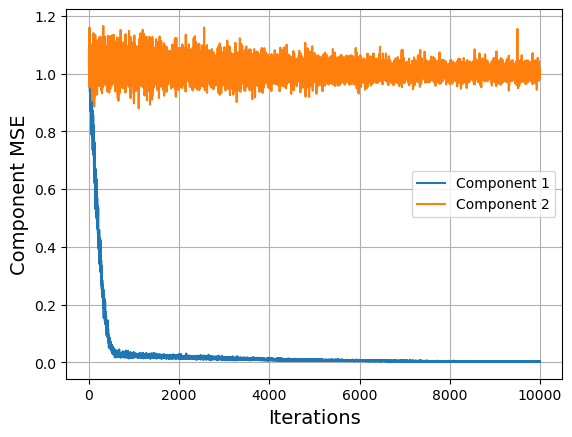

{'seed': 13, 'num_layers': 2, 'num_outputs': 3, 'lr': 0.0001, 'leap': 2, 'optimizer': 'Adam', 'batch_size': 64, 'hidden_size': 2048, 'dimension': 512, 'num_iterations': 20000, 'run_id': '6e43124e-47e7-49ea-a89f-f5b14783fcbd'}


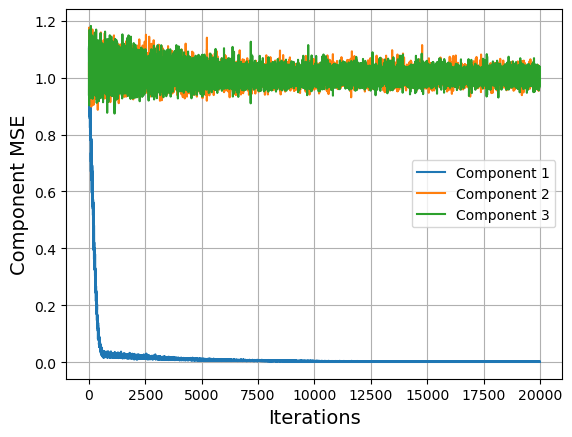

{'seed': 13, 'num_layers': 2, 'num_outputs': 3, 'lr': 0.0001, 'leap': 2, 'optimizer': 'Adam', 'batch_size': 64, 'hidden_size': 2048, 'dimension': 512, 'num_iterations': 10000, 'run_id': '3b16bd17-e333-4407-9a27-2c23be4f3a5f'}


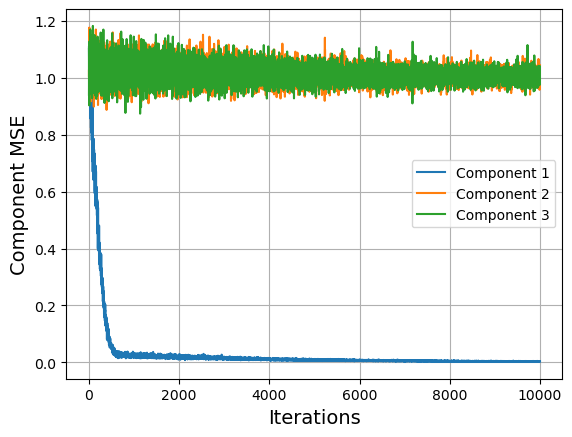

{'seed': 13, 'num_layers': 2, 'num_outputs': 1, 'lr': 0.0001, 'leap': 2, 'optimizer': 'Adam', 'batch_size': 64, 'hidden_size': 2048, 'dimension': 512, 'num_iterations': 5000, 'run_id': 'cf0e6e76-c60d-4c03-8597-4a26f17e8cb2'}


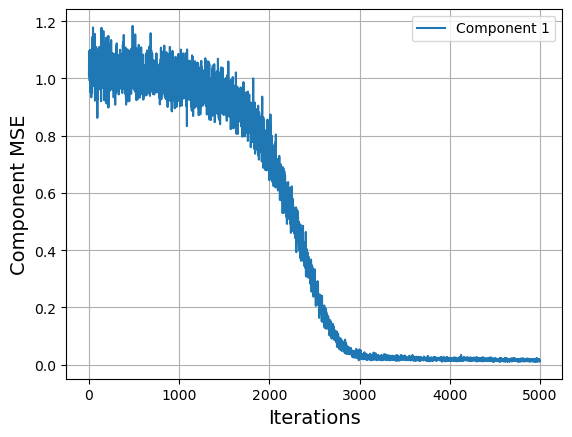

{'seed': 13, 'num_layers': 2, 'num_outputs': 3, 'lr': 1e-05, 'leap': 2, 'optimizer': 'Adam', 'batch_size': 64, 'hidden_size': 2048, 'dimension': 512, 'num_iterations': 20000, 'run_id': 'bebffef2-2ba6-4354-9105-fada78912542'}


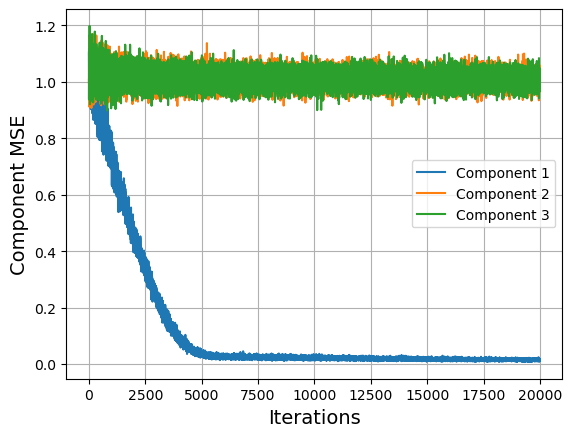

In [44]:
directory = "out/multi_output"
for file in filenames:
    params = {}
    with open(file, "r") as json_file:
        params = json.load(json_file)
    
    if params['optimizer'] != 'Adam':
        continue
    
    if params['leap'] != 2:
        continue
    
    if params['num_layers'] != 2:
        continue
        
    print(params)
    
    run_id = params['run_id']
    
    multi_losses = torch.load(os.path.join(directory, run_id, "multi_losses.pt"))
    
    plt.xlabel("Iterations", fontsize=14)
    plt.ylabel("Component MSE", fontsize=14)
    plt.grid()
    for i in range(multi_losses.shape[1]):
        plt.plot(multi_losses[:, i], label = f"Component {i+1}")
    
    plt.legend()
    plt.savefig(f"figures/{params['num_layers']}_layer_{params['num_outputs']}_out_{params['leap']}.png")
    plt.show()




{'seed': 13, 'num_layers': 3, 'num_outputs': 32, 'lr': 0.0001, 'leap': 1, 'optimizer': 'Adam', 'batch_size': 64, 'hidden_size': 2048, 'dimension': 512, 'num_iterations': 50000, 'run_id': 'b70d1452-cdf5-4a16-aeca-2ed5267b10b3'}


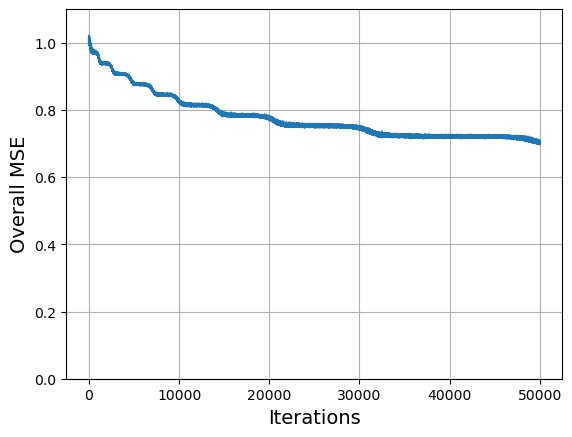

{'seed': 13, 'num_layers': 3, 'num_outputs': 16, 'lr': 0.0001, 'leap': 1, 'optimizer': 'Adam', 'batch_size': 64, 'hidden_size': 2048, 'dimension': 512, 'num_iterations': 20000, 'run_id': 'cd421f23-74b6-4a7e-b069-676e3fa5ee1e'}


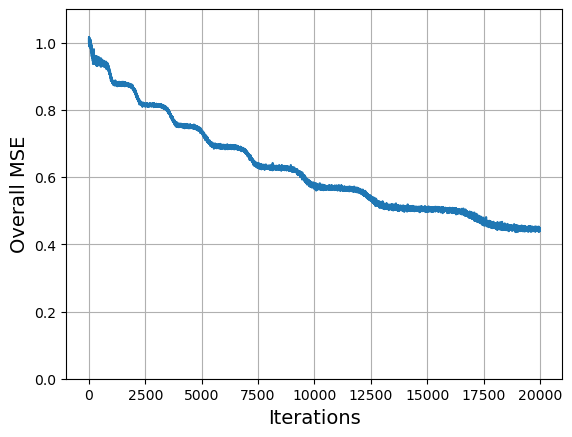

{'seed': 13, 'num_layers': 3, 'num_outputs': 4, 'lr': 0.0001, 'leap': 1, 'optimizer': 'Adam', 'batch_size': 64, 'hidden_size': 2048, 'dimension': 512, 'num_iterations': 5000, 'run_id': 'beeea547-88b8-47b6-a3cb-00f265419cc3'}


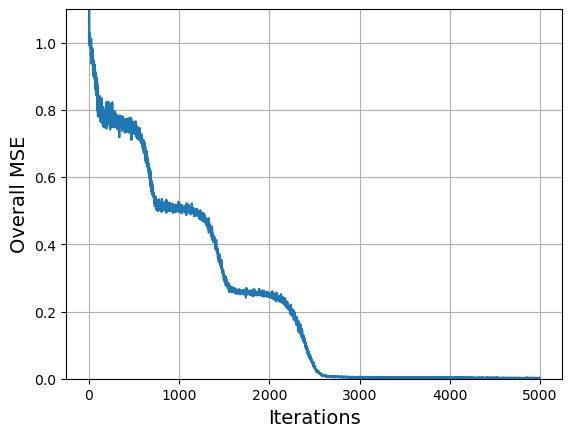

In [33]:
directory = "out/multi_output"
for file in filenames:
    params = {}
    with open(file, "r") as json_file:
        params = json.load(json_file)
    
    if params['optimizer'] != 'Adam':
        continue
    
    if params['leap'] != 1:
        continue
        
    if params['num_outputs'] not in [4, 8, 16, 32]:
        continue
    
    print(params)
    
    run_id = params['run_id']
    
    losses = torch.load(os.path.join(directory, run_id, "losses.pt"))
    
    plt.xlabel("Iterations", fontsize=14)
    plt.ylabel("Overall MSE", fontsize=14)
    plt.ylim(0, 1.1)
    plt.grid()

    plt.plot(losses)
    plt.savefig(f"figures/{params['num_layers']}_layer_{params['num_outputs']}_out_{params['leap']}_combined.png")
    plt.show()

In [55]:
x = torch.tensor([[1,2,3,4,5],[6, 7, 8,9,10]])
x[:, [[1,2], [1]]].shape

ValueError: expected sequence of length 2 at dim 1 (got 1)